# Base Ball

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df= pd.read_csv("baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.shape

(30, 17)

In [4]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [5]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


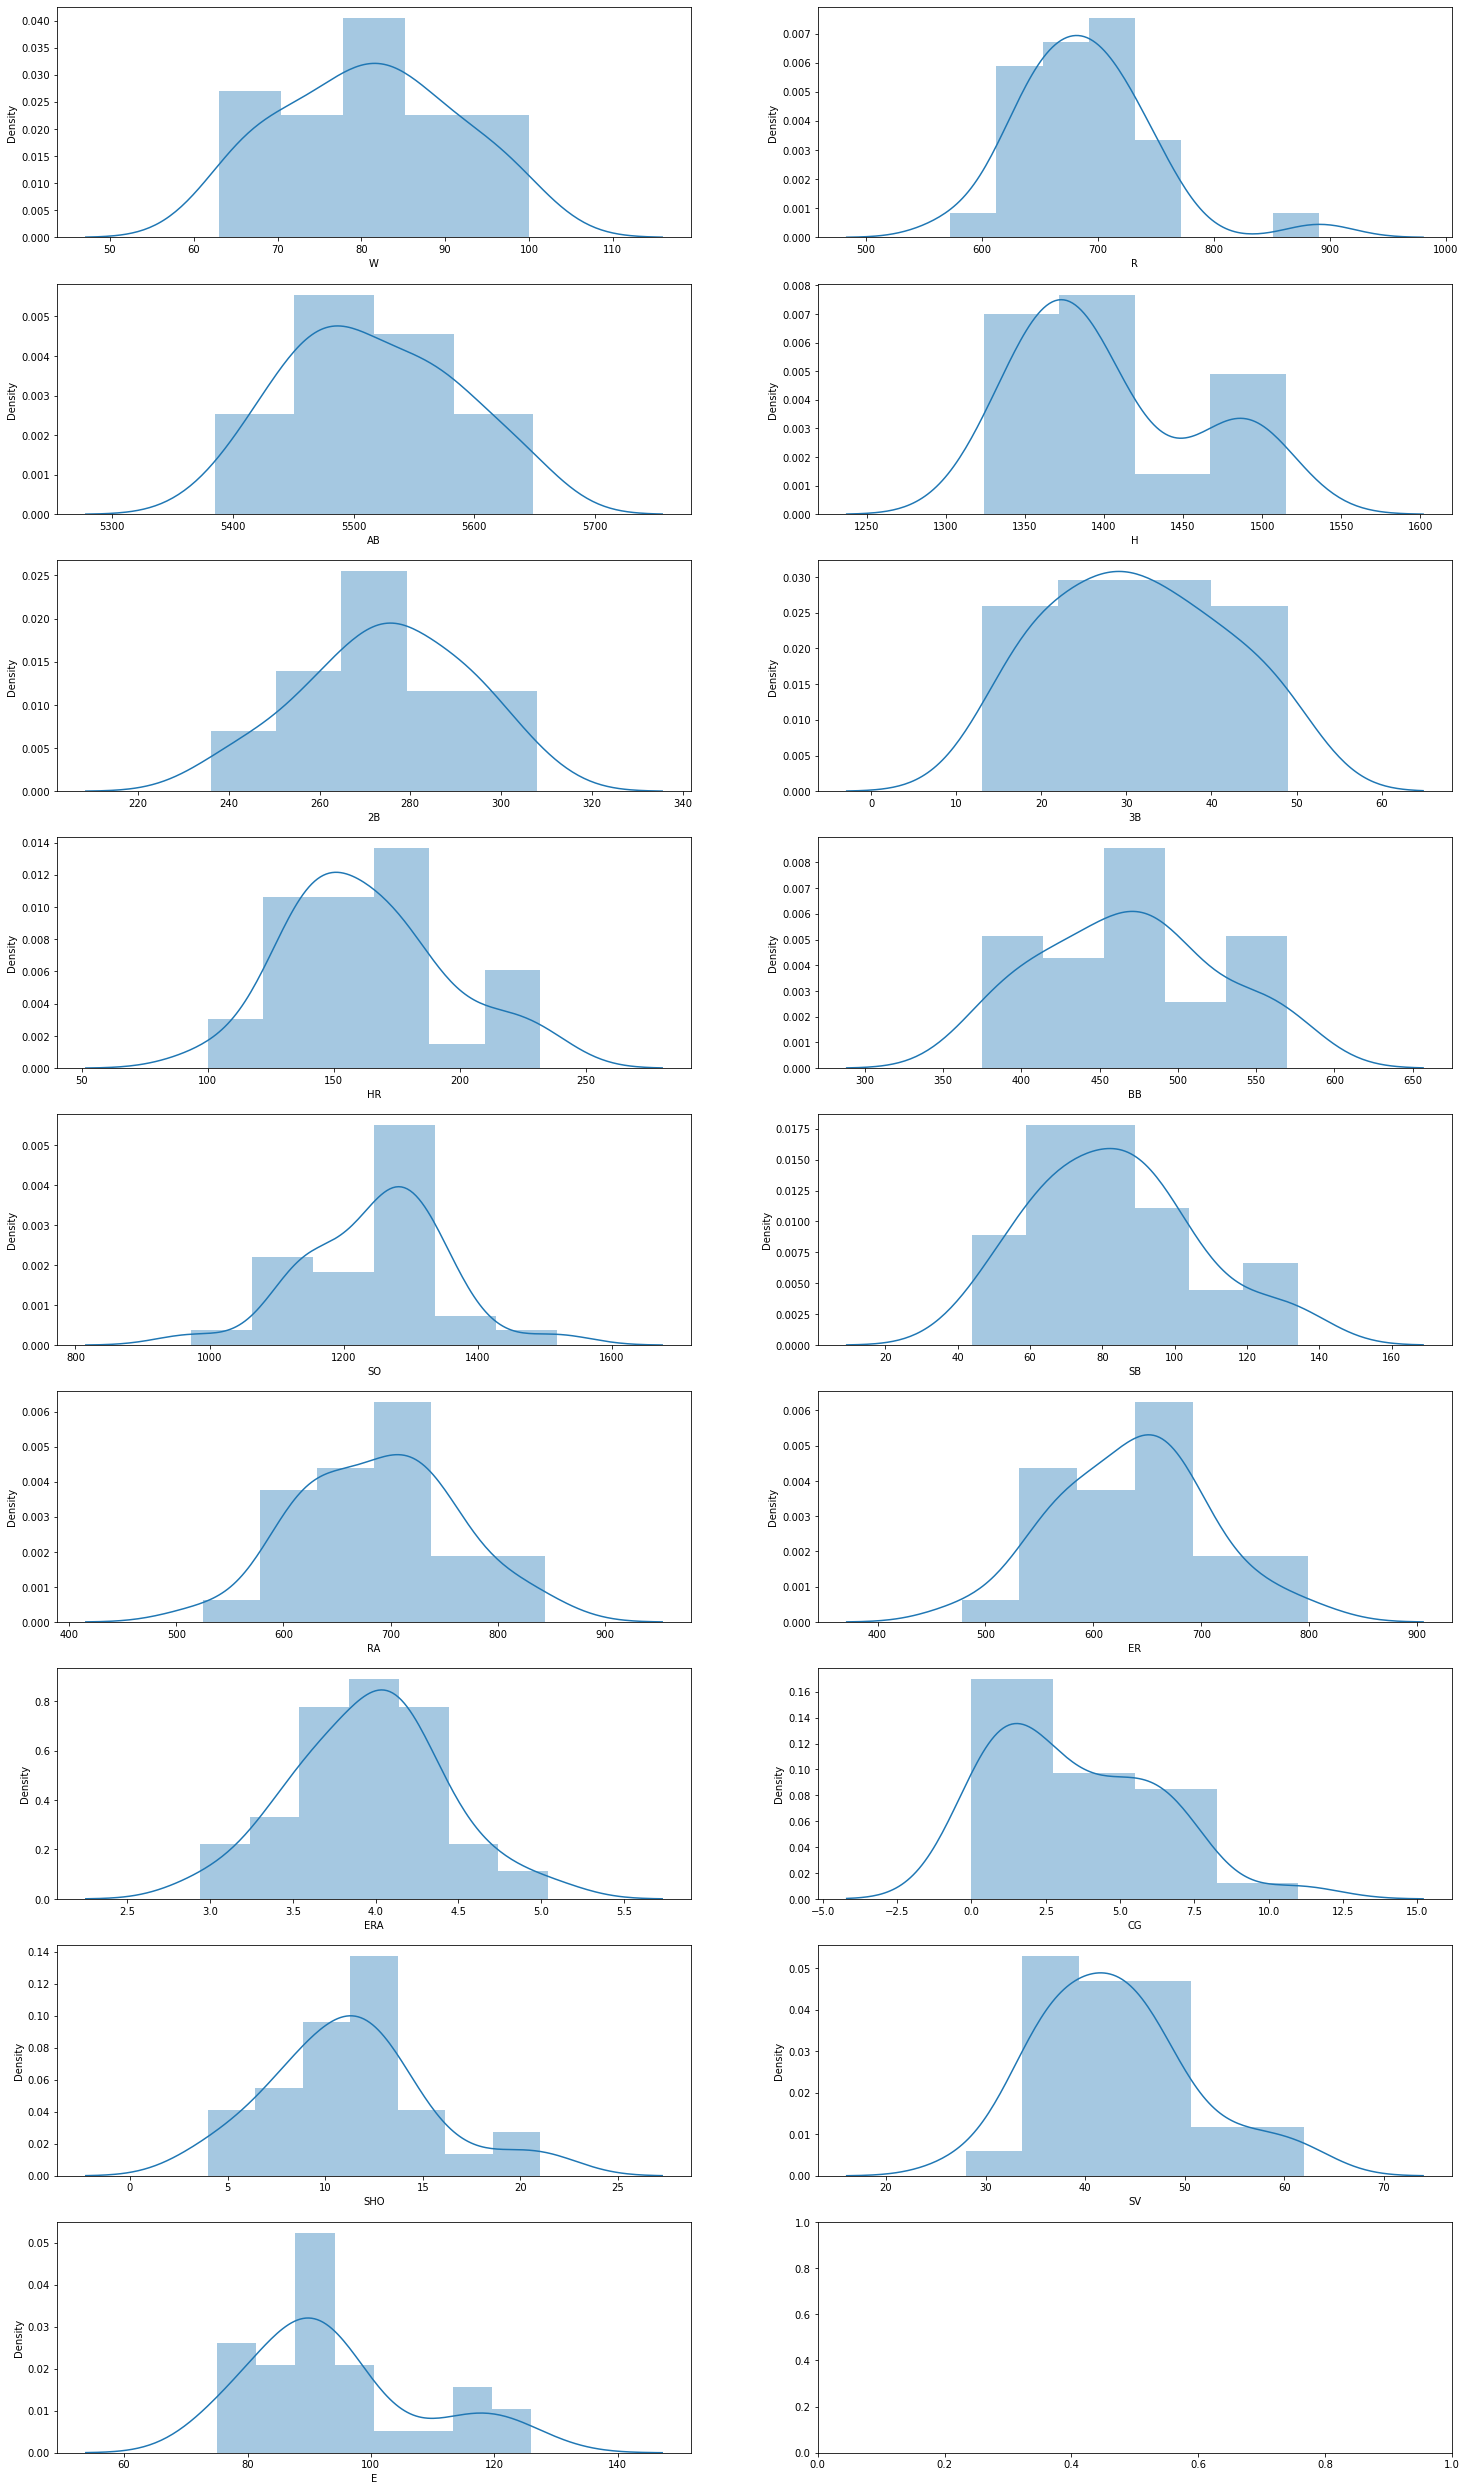

In [7]:
columns = ['W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']
fig,ax = plt.subplots(9,2,figsize=(25,45))
row = col = 0
for n,i in enumerate(columns):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    sn.distplot(df[i],kde=True,ax=ax[row,col])
    col += 1

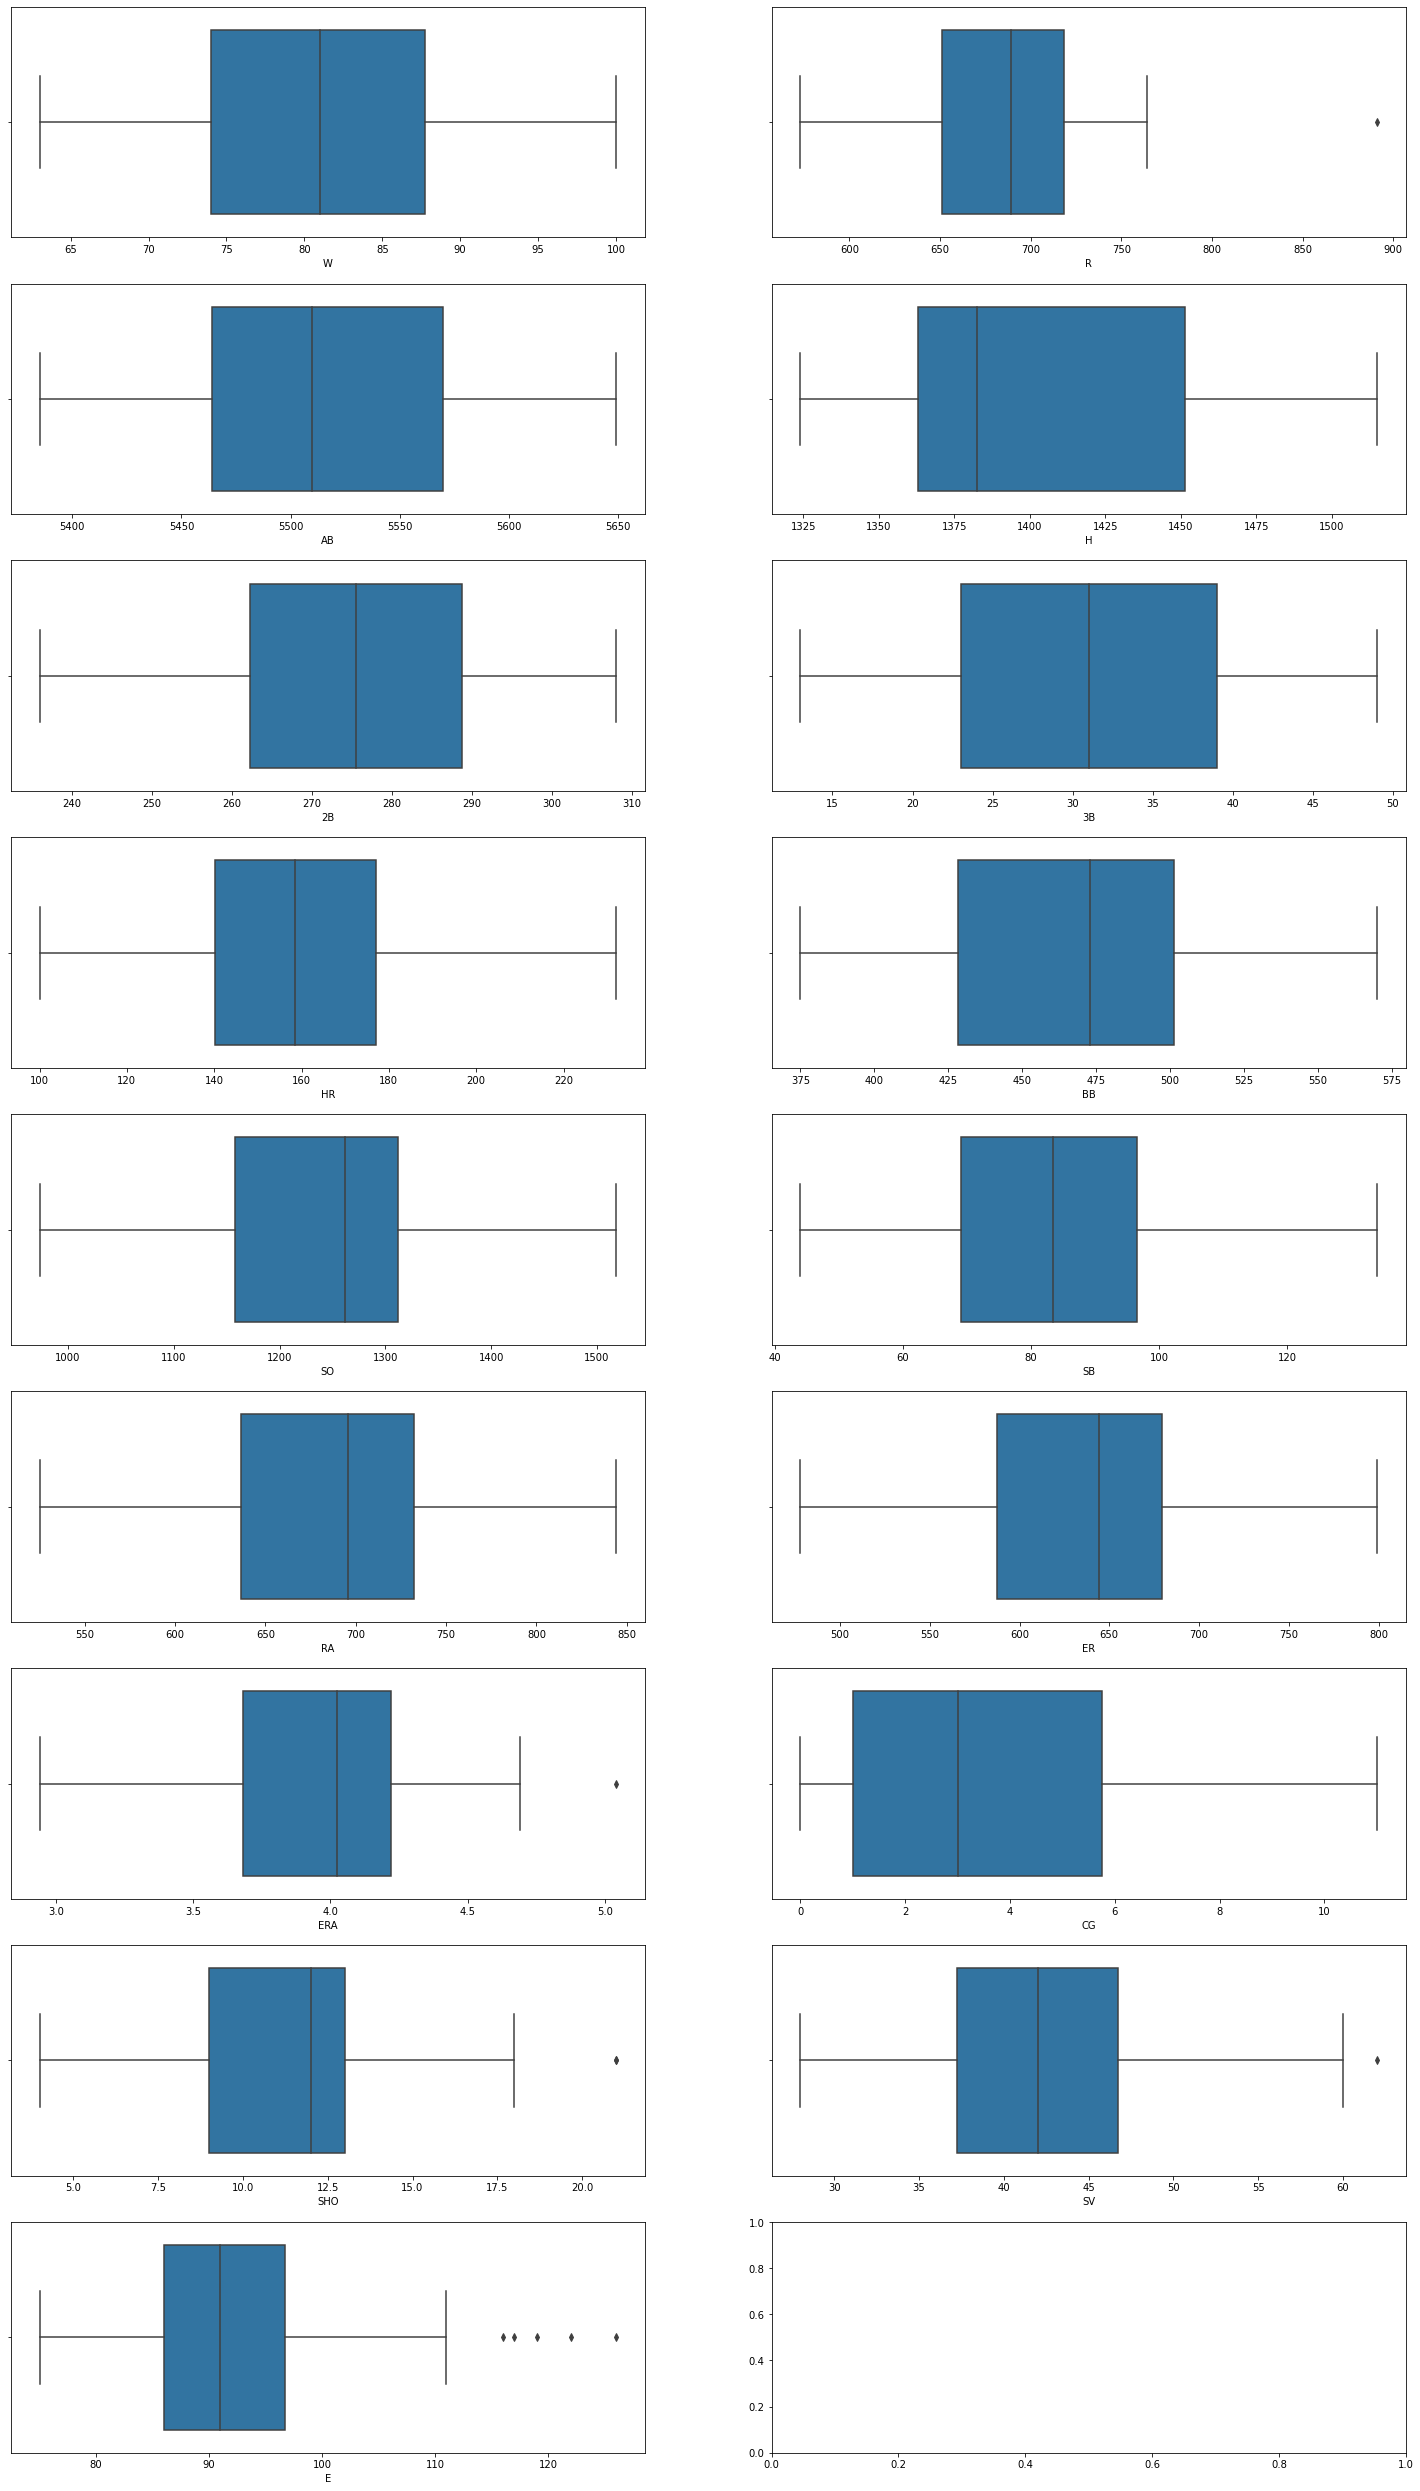

In [8]:
#Checking for outliers
fig,ax = plt.subplots(9,2,figsize=(25,45))
row = col = 0
for n,i in enumerate(columns):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    sn.boxplot(df[i],ax=ax[row,col])
    col += 1

In [9]:
#Removing outliers using IQr from E column
Q1 = df['E'].quantile(0.25)
Q3 = df['E'].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
df = df[(df['E']>lower_lim)&(df['E']<upper_lim)]
df.shape

(25, 17)

Bivariate Analysis

<AxesSubplot:title={'center':'Comparision between W and AB'}, xlabel='AB', ylabel='W'>

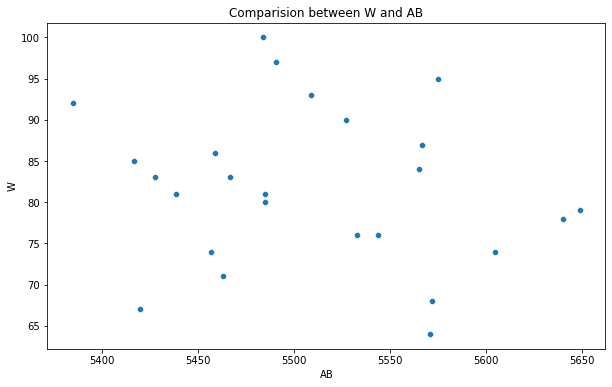

In [10]:
plt.figure(figsize=[10,6])
plt.title("Comparision between W and AB")
sn.scatterplot(df['AB'],df['W'])

<AxesSubplot:xlabel='H', ylabel='W'>

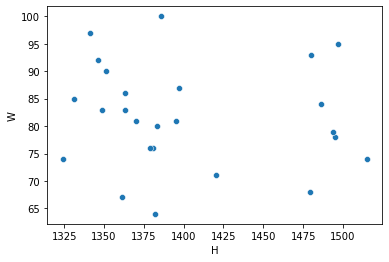

In [11]:
sn.scatterplot(df['H'],df['W'])

<AxesSubplot:xlabel='R', ylabel='W'>

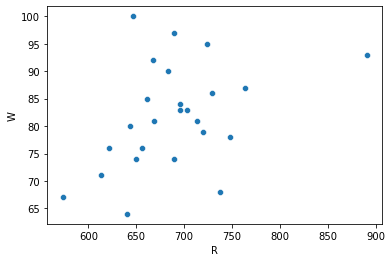

In [12]:
sn.scatterplot(df['R'],df['W'])

<AxesSubplot:xlabel='RA', ylabel='W'>

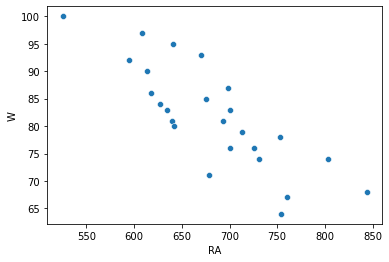

In [13]:
sn.scatterplot(df['RA'],df['W'])

<AxesSubplot:xlabel='ER', ylabel='W'>

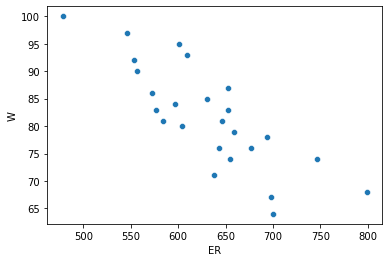

In [14]:
sn.scatterplot(df['ER'],df['W'])

<AxesSubplot:xlabel='ERA', ylabel='W'>

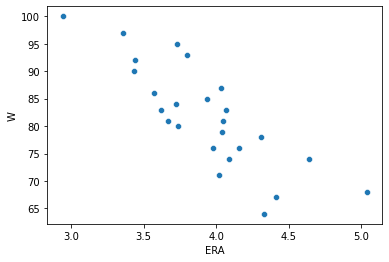

In [15]:
sn.scatterplot(df['ERA'],df['W'])

<AxesSubplot:xlabel='ER', ylabel='ERA'>

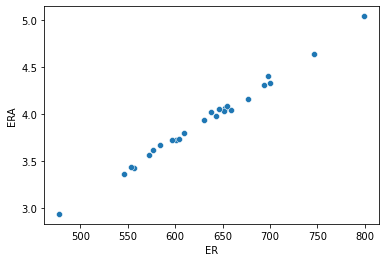

In [16]:
sn.scatterplot(df['ER'],df['ERA'])

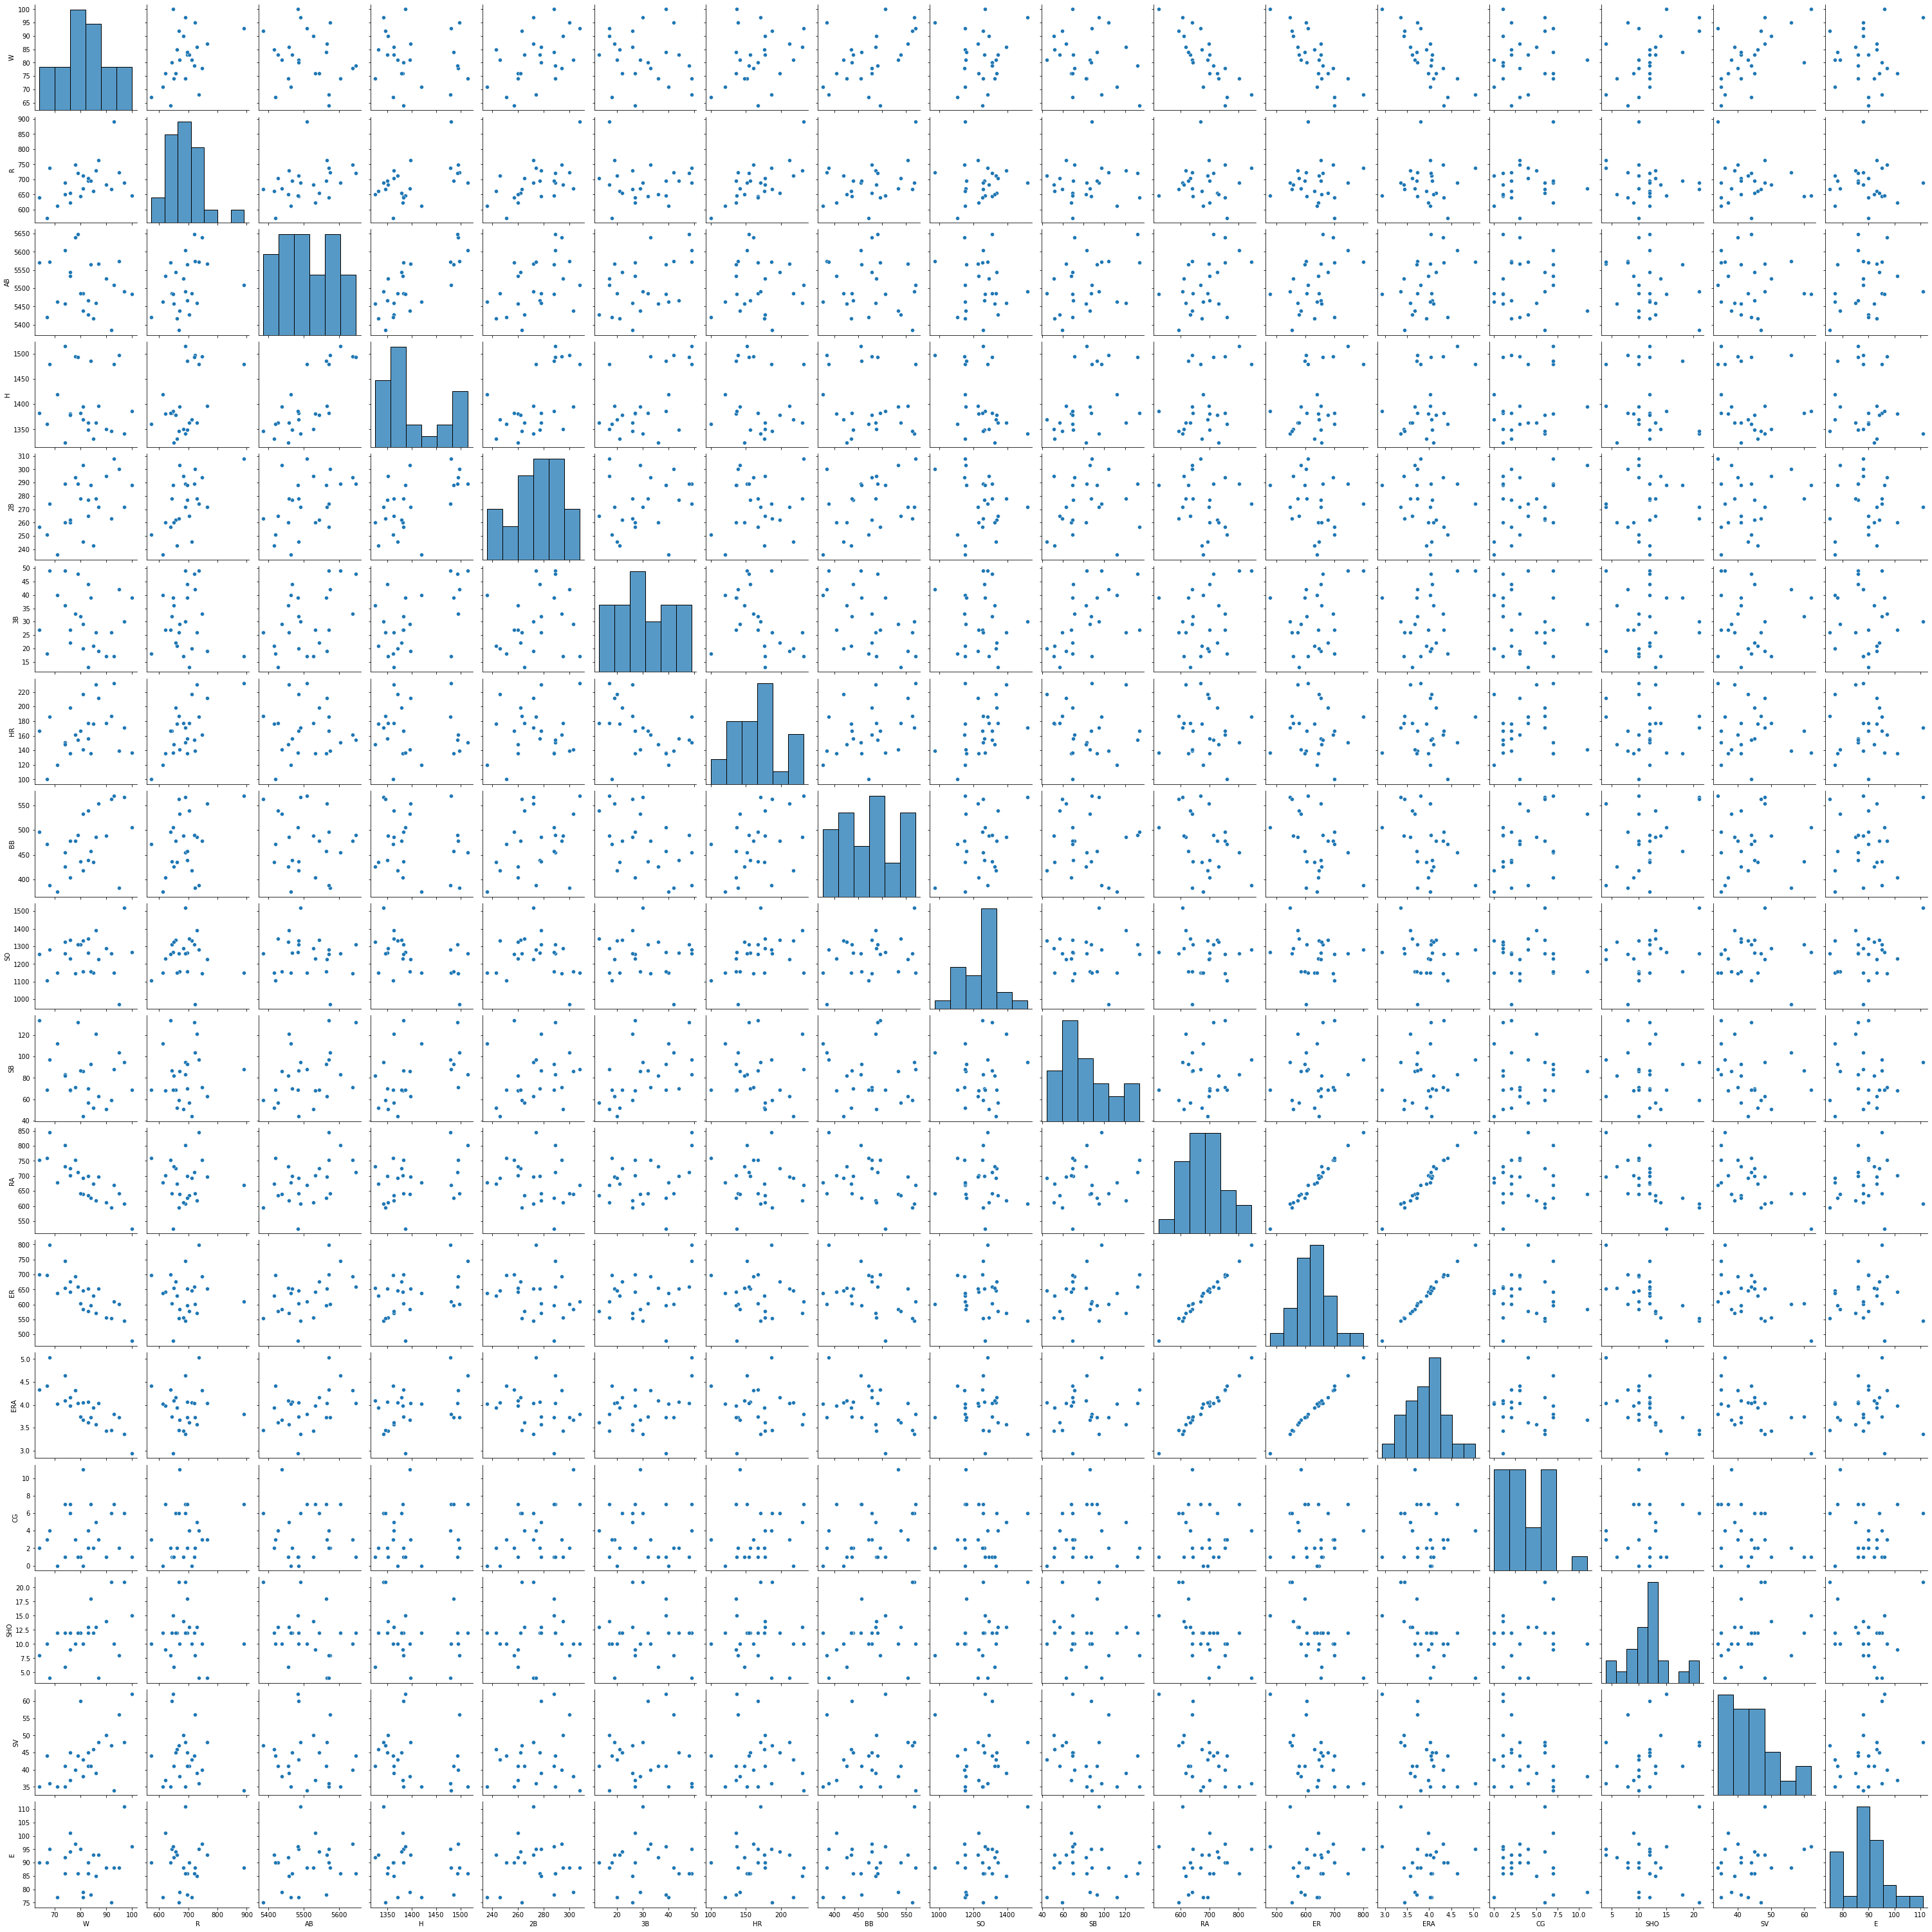

In [17]:
sn.pairplot(df)

In [18]:
cmap = sn.diverging_palette(220,10,as_cmap= True)

<AxesSubplot:>

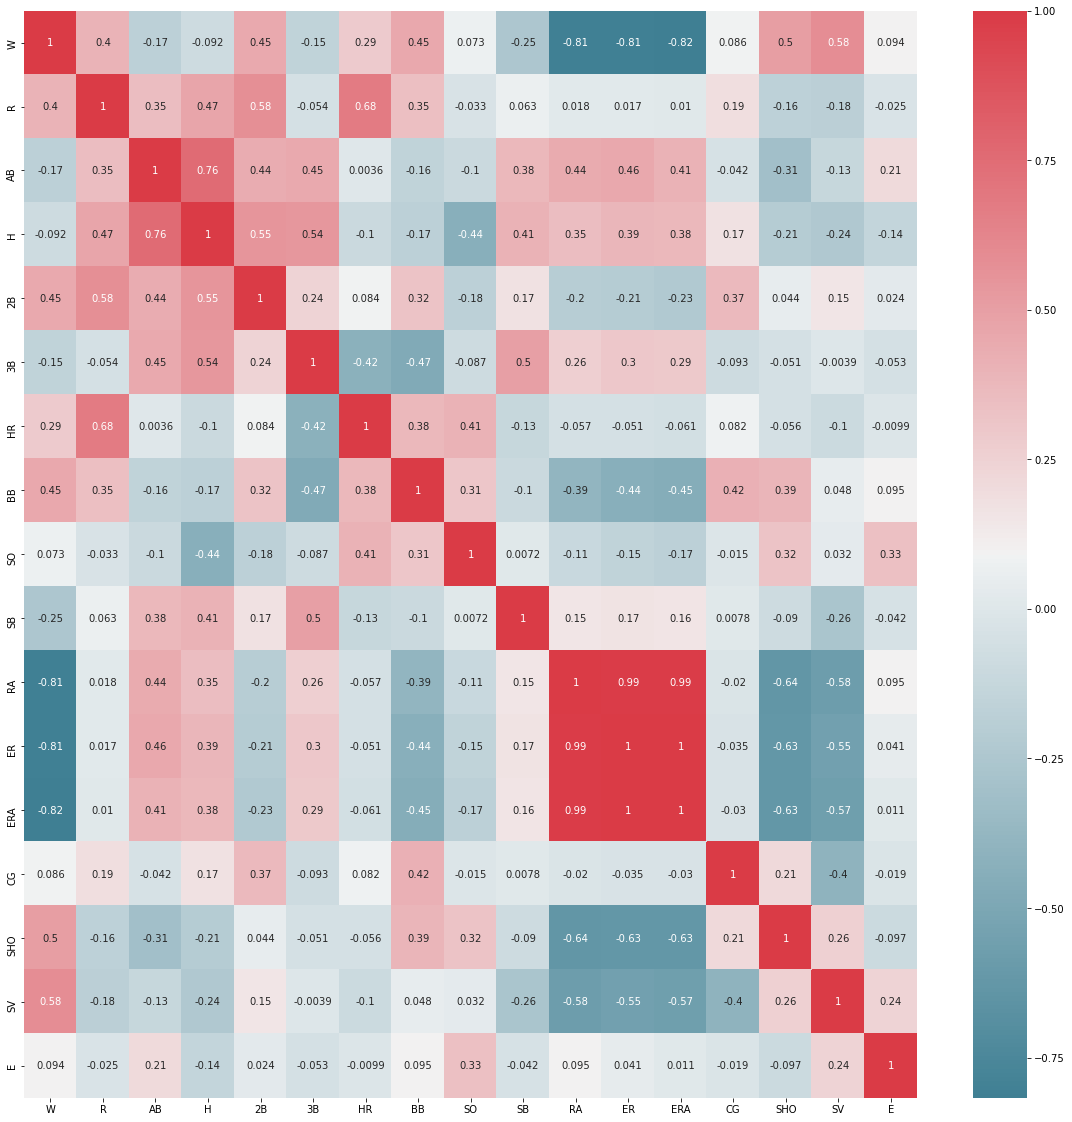

In [19]:
plt.figure(figsize=(20,20))
sn.heatmap(df.corr(),annot=True,cmap=cmap)

In [20]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_zscore=df[(z<3).all(axis=1)]
df_zscore.shape

(24, 17)

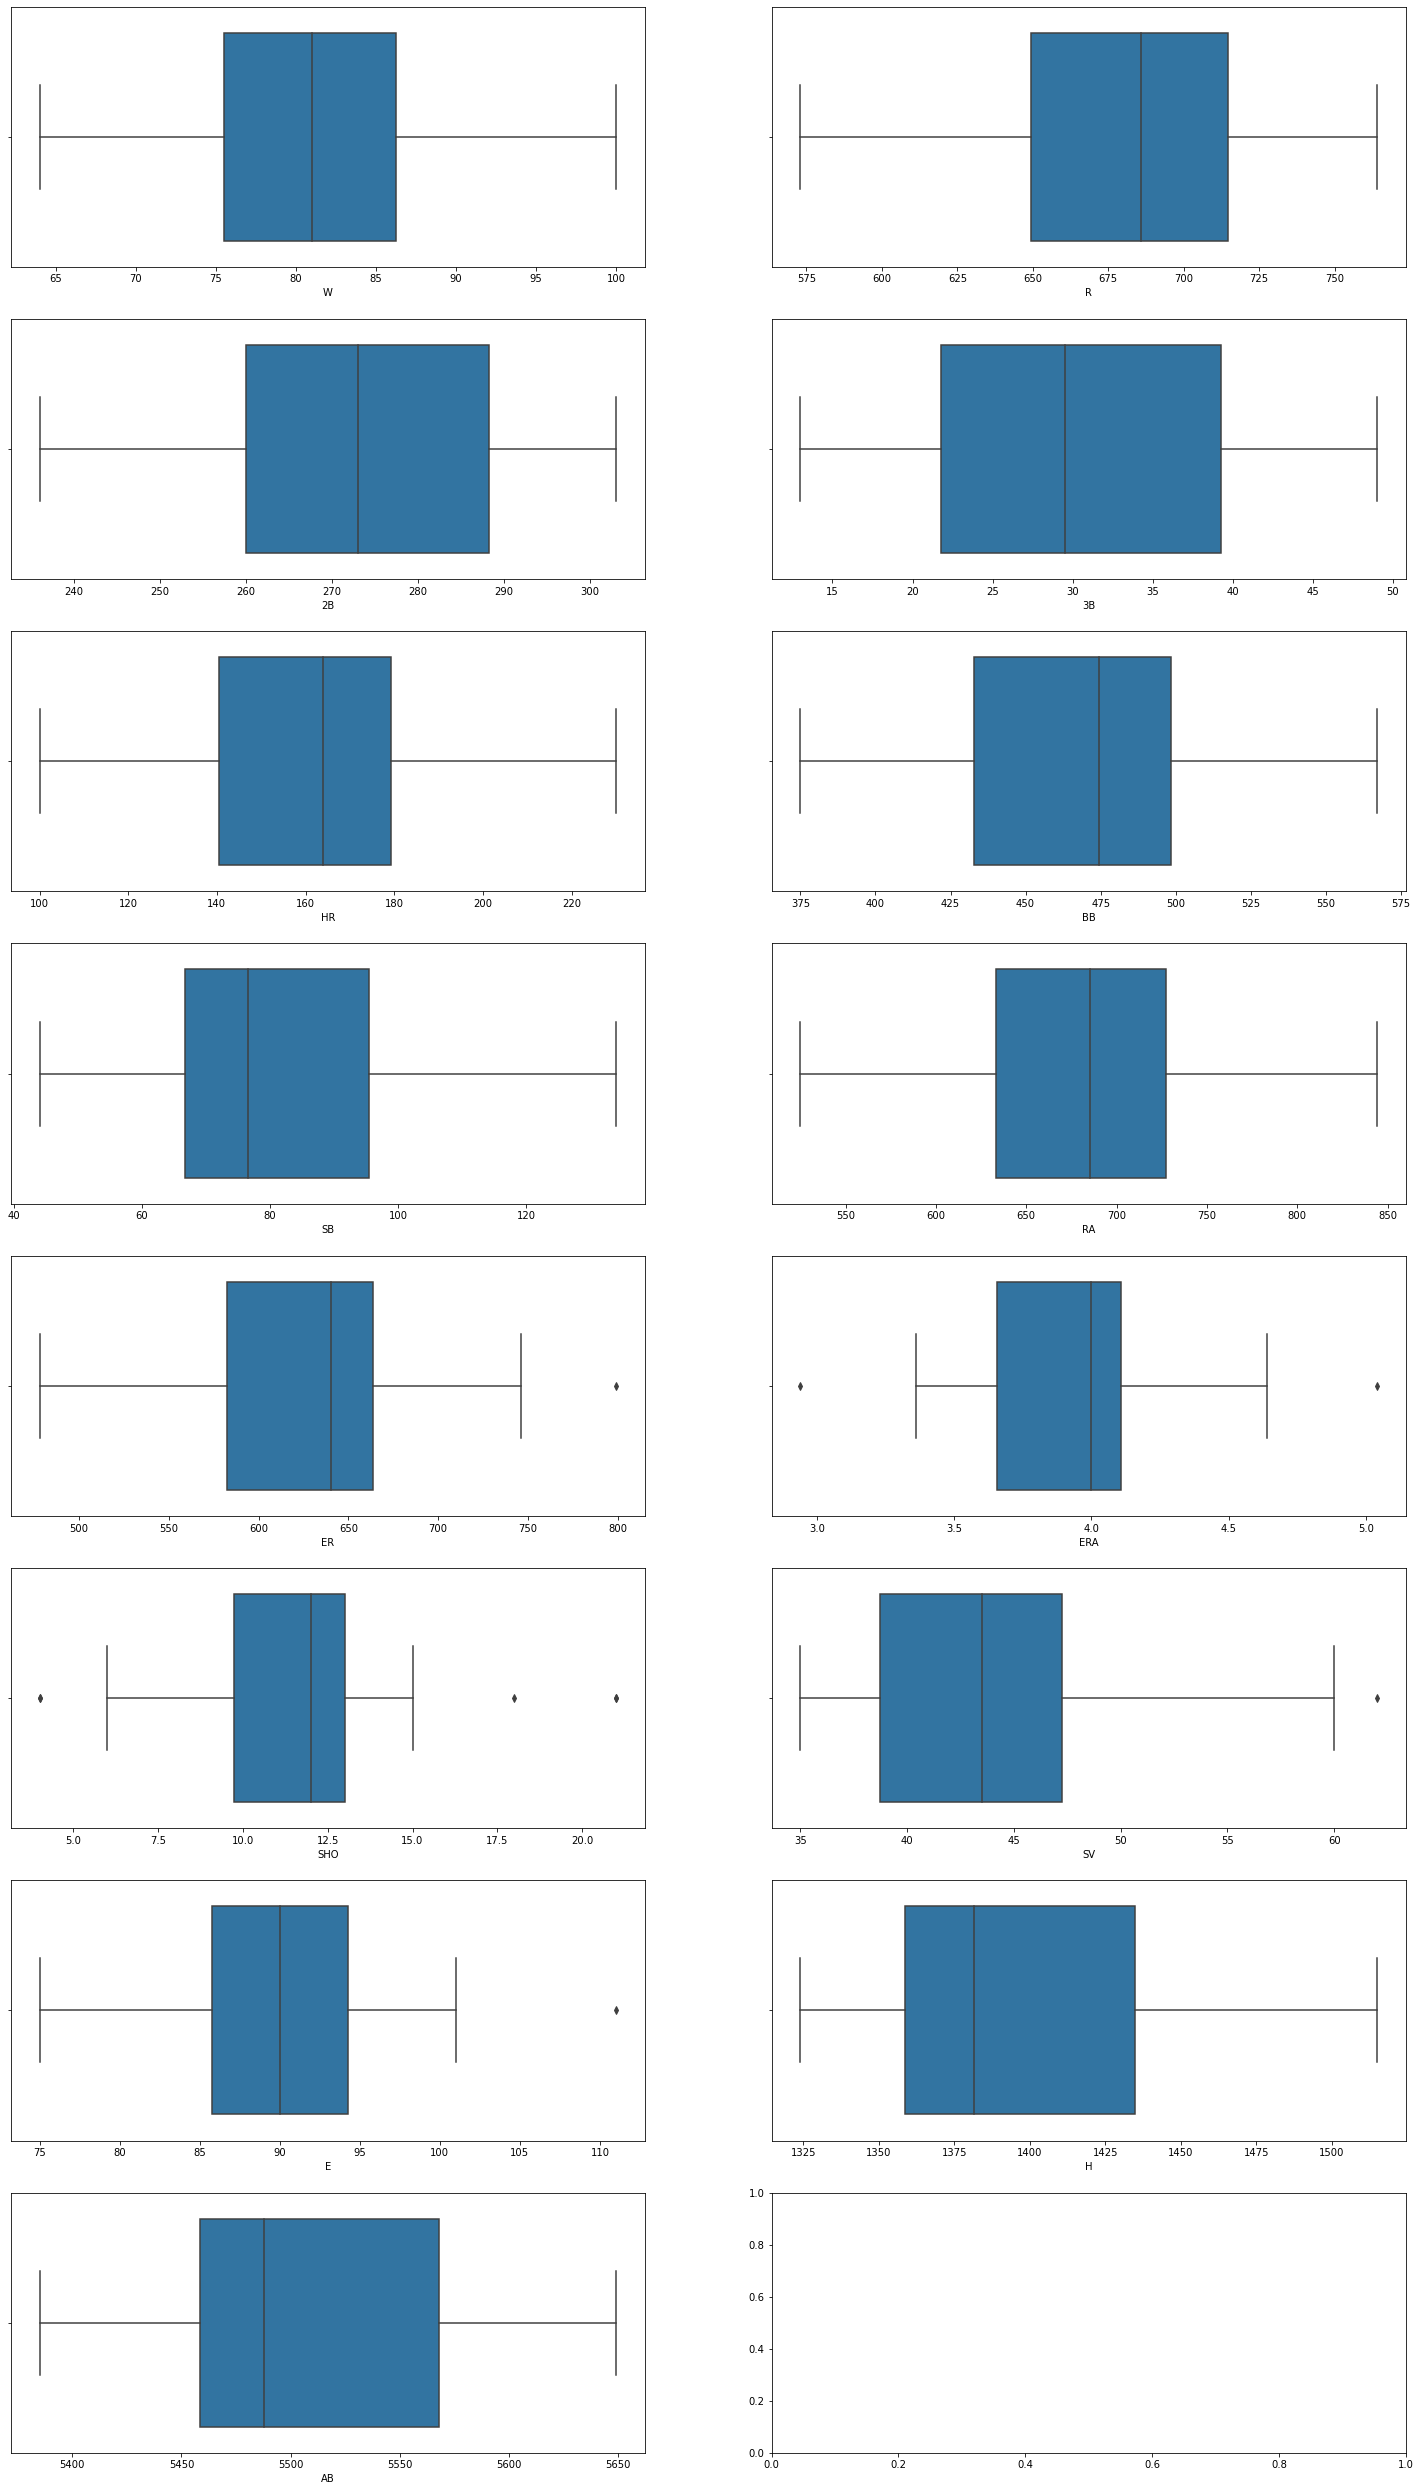

In [21]:
columns1 = ['W','R','2B','3B','HR','BB','SB','RA','ER','ERA','SHO','SV','E','H','AB']
fig,ax = plt.subplots(8,2,figsize=(25,45))
row = col = 0
for n,i in enumerate(columns1):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    sn.boxplot(df_zscore[i],ax=ax[row,col])
    col += 1

In [22]:
df_zscore.skew()

W      0.150095
R     -0.283799
AB     0.267092
H      0.824277
2B    -0.188987
3B     0.201691
HR     0.231168
BB     0.108890
SO    -0.192100
SB     0.635142
RA     0.175516
ER     0.200941
ERA    0.240317
CG     0.868504
SHO    0.483189
SV     0.985828
E      0.321413
dtype: float64

In [23]:
# So let us apply yeo johnson
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
dfpt=pt.fit_transform(df_zscore)
df_zscore=pd.DataFrame(dfpt,columns=df_zscore.columns)
df_zscore.skew()

W     -0.008491
R     -0.028255
AB     0.000000
H      0.582090
2B    -0.050431
3B    -0.061745
HR    -0.005584
BB    -0.015181
SO     0.043126
SB     0.009618
RA    -0.000838
ER     0.004133
ERA    0.004169
CG    -0.042603
SHO    0.008937
SV     0.070994
E      0.000286
dtype: float64

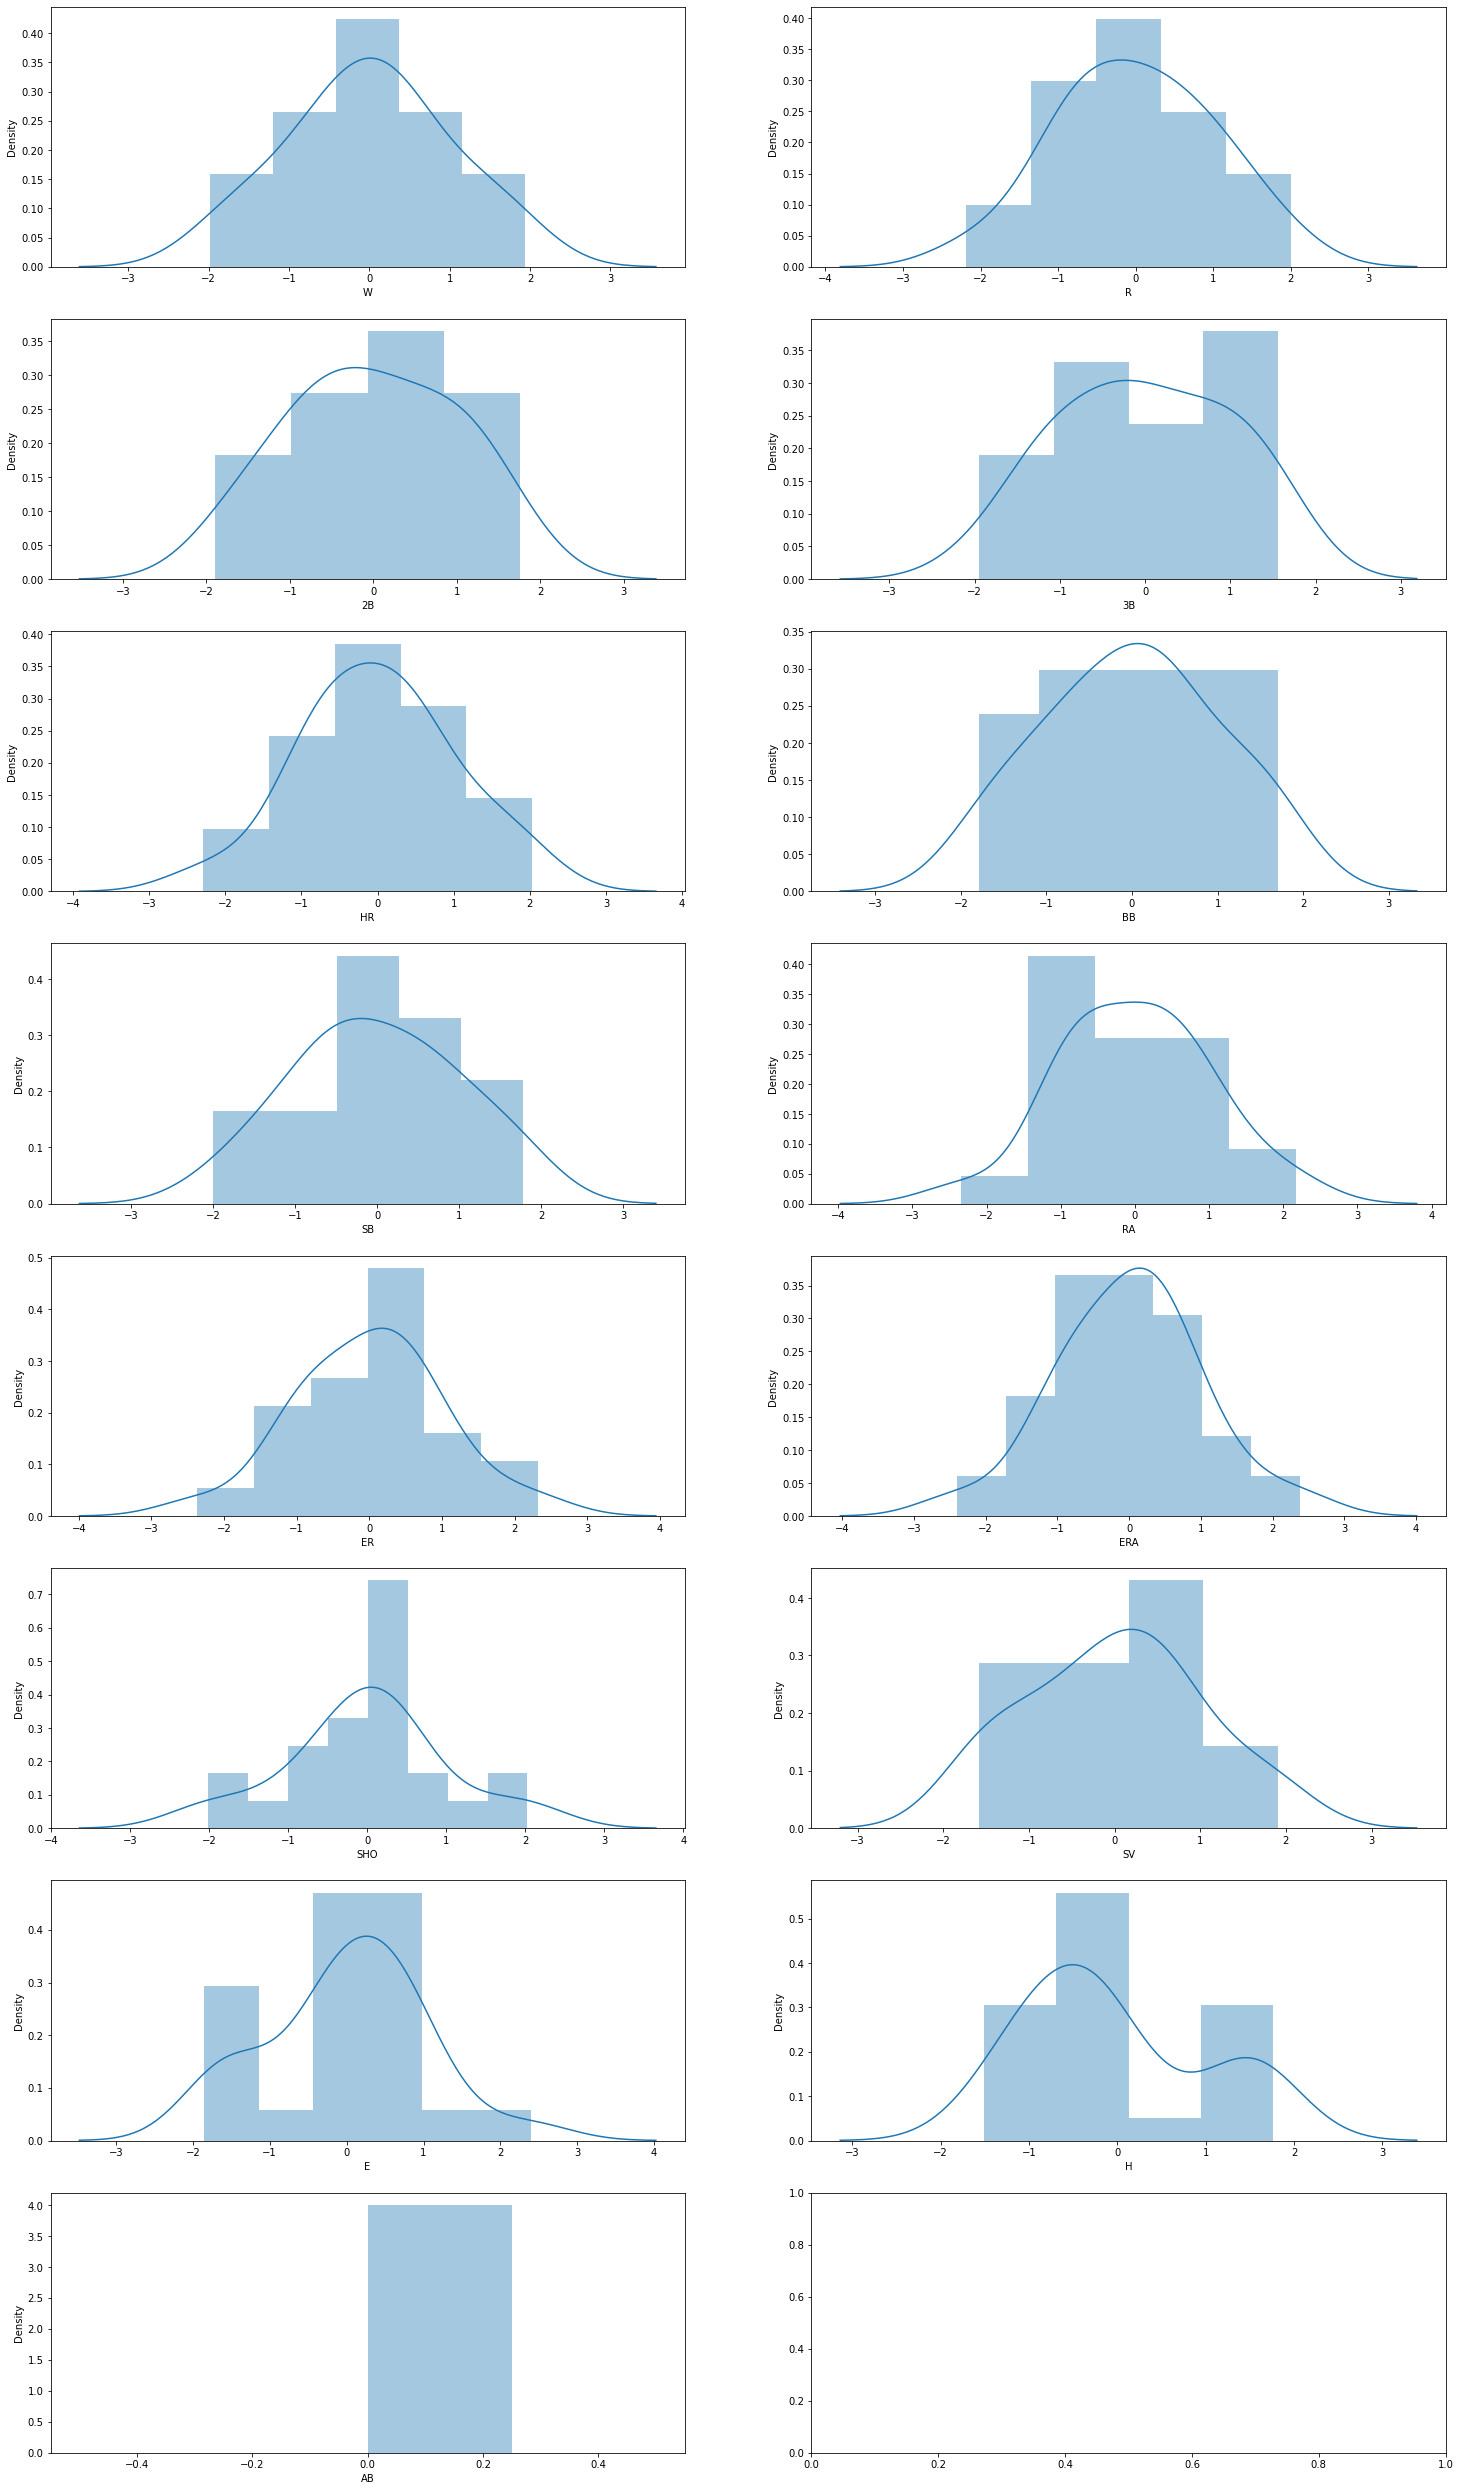

In [24]:
fig,ax = plt.subplots(8,2,figsize=(25,45))
row = col = 0
for n,i in enumerate(columns1):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    sn.distplot(df_zscore[i],kde=True,ax=ax[row,col])
    col += 1

In [25]:
#Lets split the dependent and independent variables
y = df_zscore['W']
x = df_zscore
x.drop('W',axis = 1, inplace = True)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.97277211,  0.        ,  1.55402249,  1.5736253 ,  1.02584224,
        -0.81874059, -1.62277348, -2.4606949 ,  0.95412124, -0.56269587,
        -0.4238583 , -0.43280418, -0.39875057, -0.82605619,  1.49819221,
        -0.103679  ],
       [ 0.30278838,  0.        , -0.88751172,  0.21084883,  1.18384524,
        -0.23487533, -0.5263537 ,  0.08744339, -0.37354831,  0.27788309,
         0.33638438,  0.34560303, -0.39875057,  0.16469713,  0.35507713,
        -0.3537816 ],
       [-0.30591654,  0.        ,  0.03858747,  1.76108516, -0.10999145,
        -0.74847919,  1.14373671, -0.8941514 ,  0.32405871, -0.57730316,
        -0.67963269, -0.57411927,  1.97893318, -0.3128564 , -0.8576003 ,
        -1.28115326],
       [-1.28023873,  0.        , -0.21398504, -0.71269445, -0.30599954,
        -0.92497217, -1.20129682, -0.22065867, -0.47304515,  0.29178656,
         0.19265215,  0.14312549,  1.20819843, -0.56440072, -1.0813698 ,
         1.38613139],
       [ 0.14148477,  0.        ,  1

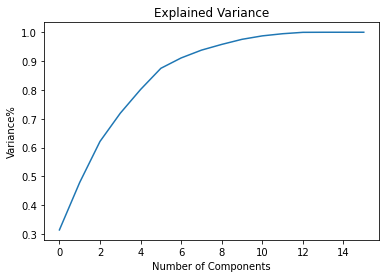

In [27]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance%')
plt.title('Explained Variance')
plt.show()

We can see that 95% variance can be explained using only 8 components.

In [28]:
pca = PCA(n_components=8)
new_data = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(new_data,columns = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])
pca_df

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,0.995216,3.184606,1.175527,2.432676,0.017502,-0.944263,0.561763,0.720629
1,0.378320,0.039048,0.322054,0.506170,0.356810,0.402509,-0.857489,-0.003936
2,-0.542072,1.902890,-0.074756,-1.460918,-1.988671,-0.844176,1.122791,0.336574
3,0.946219,-1.034822,1.011224,-1.306020,0.436145,-1.398408,-0.155798,1.587271
4,3.416807,1.273085,-0.929585,-1.390077,-0.597467,0.016577,-1.362222,-0.285553
5,-0.038752,-1.012041,-2.656929,1.789313,-0.681198,-1.099668,1.255800,-0.505809
6,-0.230165,-2.684737,-0.240991,2.275742,-1.150649,1.826808,-0.763375,0.015801
7,-1.095254,0.155982,0.746673,0.918865,1.714074,-0.075946,-0.206613,-0.151153
8,1.974462,1.101144,-1.454624,0.791343,-0.336546,-1.247448,-0.457546,-0.472784
9,-1.489307,0.375913,-2.070098,-0.605578,0.022071,1.892781,1.122300,1.048874


In [31]:
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [32]:
model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y = train_test_split(x_scaled,y,random_state = r_state,test_size = 0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score correspond to random state  40 is -1.7625720604425537
R2 score correspond to random state  40 is 0.3263319435294485
R2 score correspond to random state  40 is 0.16044790092940853
R2 score correspond to random state  40 is -68.69648044100641
R2 score correspond to random state  40 is -0.10418945370620425
R2 score correspond to random state  41 is -0.005089418629783404
R2 score correspond to random state  41 is 0.4436643976692135
R2 score correspond to random state  41 is 0.27245754775875963
R2 score correspond to random state  41 is -54.25491295633801
R2 score correspond to random state  41 is 0.06081842446275343
R2 score correspond to random state  42 is 0.1321479663469588
R2 score correspond to random state  42 is 0.6466587056290573
R2 score correspond to random state  42 is 0.44970004785476203
R2 score correspond to random state  42 is -1641.6785590343773
R2 score correspond to random state  42 is 0.4314769784283493
R2 score correspond to random state  43 is 0.10349093350305

R2 score correspond to random state  66 is 0.6463076708327931
R2 score correspond to random state  66 is -0.44735196511963937
R2 score correspond to random state  66 is 0.274087614665824
R2 score correspond to random state  67 is 0.24352941599632527
R2 score correspond to random state  67 is 0.4254100830244518
R2 score correspond to random state  67 is 0.15187778954548847
R2 score correspond to random state  67 is -169.42697766837966
R2 score correspond to random state  67 is 0.2684313909713174
R2 score correspond to random state  68 is -0.20026452420862517
R2 score correspond to random state  68 is 0.30769262047411816
R2 score correspond to random state  68 is 0.49449146733230187
R2 score correspond to random state  68 is -3.1717486318454045
R2 score correspond to random state  68 is 0.2747387718356924
R2 score correspond to random state  69 is 0.06749053647748626
R2 score correspond to random state  69 is 0.40290640291839686
R2 score correspond to random state  69 is 0.33217588781430

In [33]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,random_state = 56,test_size = 0.33)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lm = LinearRegression()
lm.fit(X_train,y_train)
pred= lm.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.7711775737544385
Mean absolute error =  0.43036596606624256
Mean Squared error =  0.2745173752838428
Root Mean Sqaured Error=  0.5239440573991109


# Hyperparameter Tuning

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
parameters={"copy_X":["True","False"],
            "fit_intercept":["True","False"],
            "normalize":["True","False"],
             "n_jobs" : [10,100,200,1,500,None]
           
           }

In [37]:
GCV = GridSearchCV(LinearRegression(),parameters,cv =3)

In [38]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'n_jobs': [10, 100, 200, 1, 500, None],
                         'normalize': ['True', 'False']})

In [39]:
GCV.best_params_

{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': 10, 'normalize': 'True'}

In [40]:
Final_mod = LinearRegression(copy_X=True,fit_intercept=True,n_jobs=10,normalize=True)

In [41]:
Final_mod.fit(X_train,y_train)
ypred_final = Final_mod.predict(X_test)

In [42]:
r2=r2_score(y_test,ypred_final)
r2

0.7711775737544384

Saving the Model

In [43]:
import joblib

In [44]:
joblib.dump(Final_mod,"Baseball.pkl")

['Baseball.pkl']